In [4]:
# Maternal Health Risk Prediction 
#I will start with importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



In [5]:
# Loading my dataset
df = pd.read_csv("Maternal Health Risk Data Set.csv")

In [6]:
# Inspect data
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [8]:
print(df['RiskLevel'].value_counts())

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


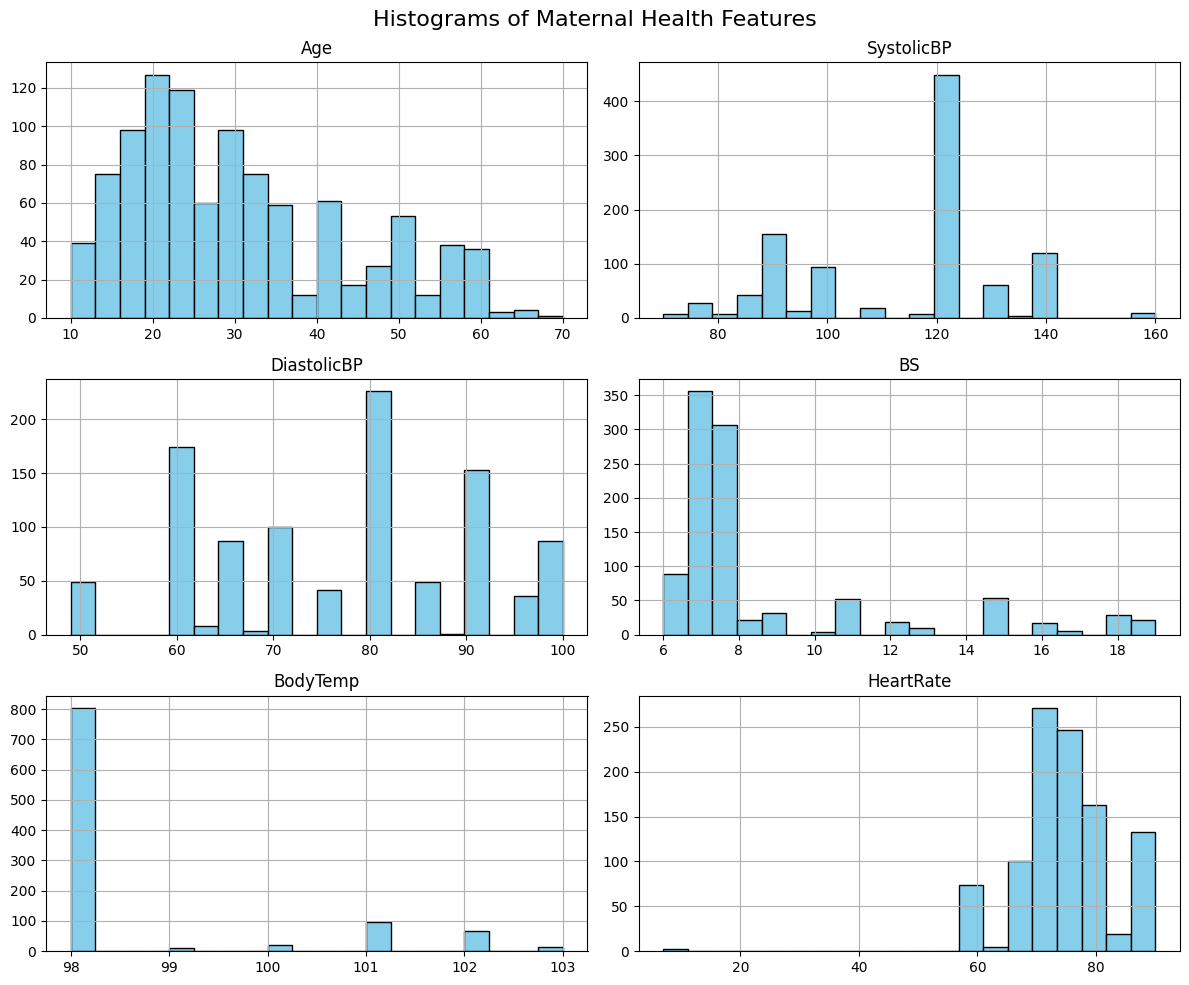

In [26]:
# List of numeric columns (excluding target)
num_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Plot histograms
df[num_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

plt.suptitle("Histograms of Maternal Health Features", fontsize=16)
plt.tight_layout()
plt.show()

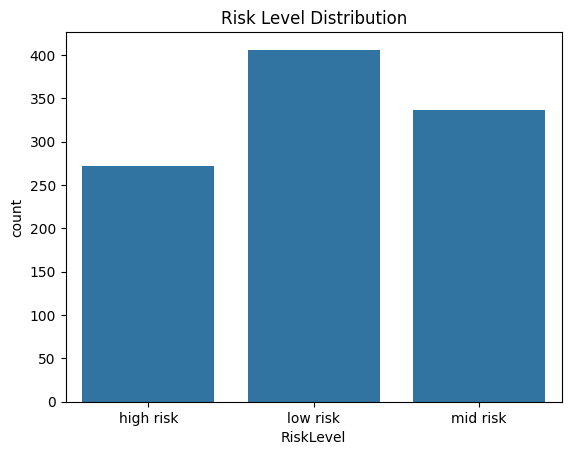

In [9]:
# EDA: Risk level distribution
sns.countplot(x='RiskLevel', data=df)
plt.title("Risk Level Distribution")
plt.show()

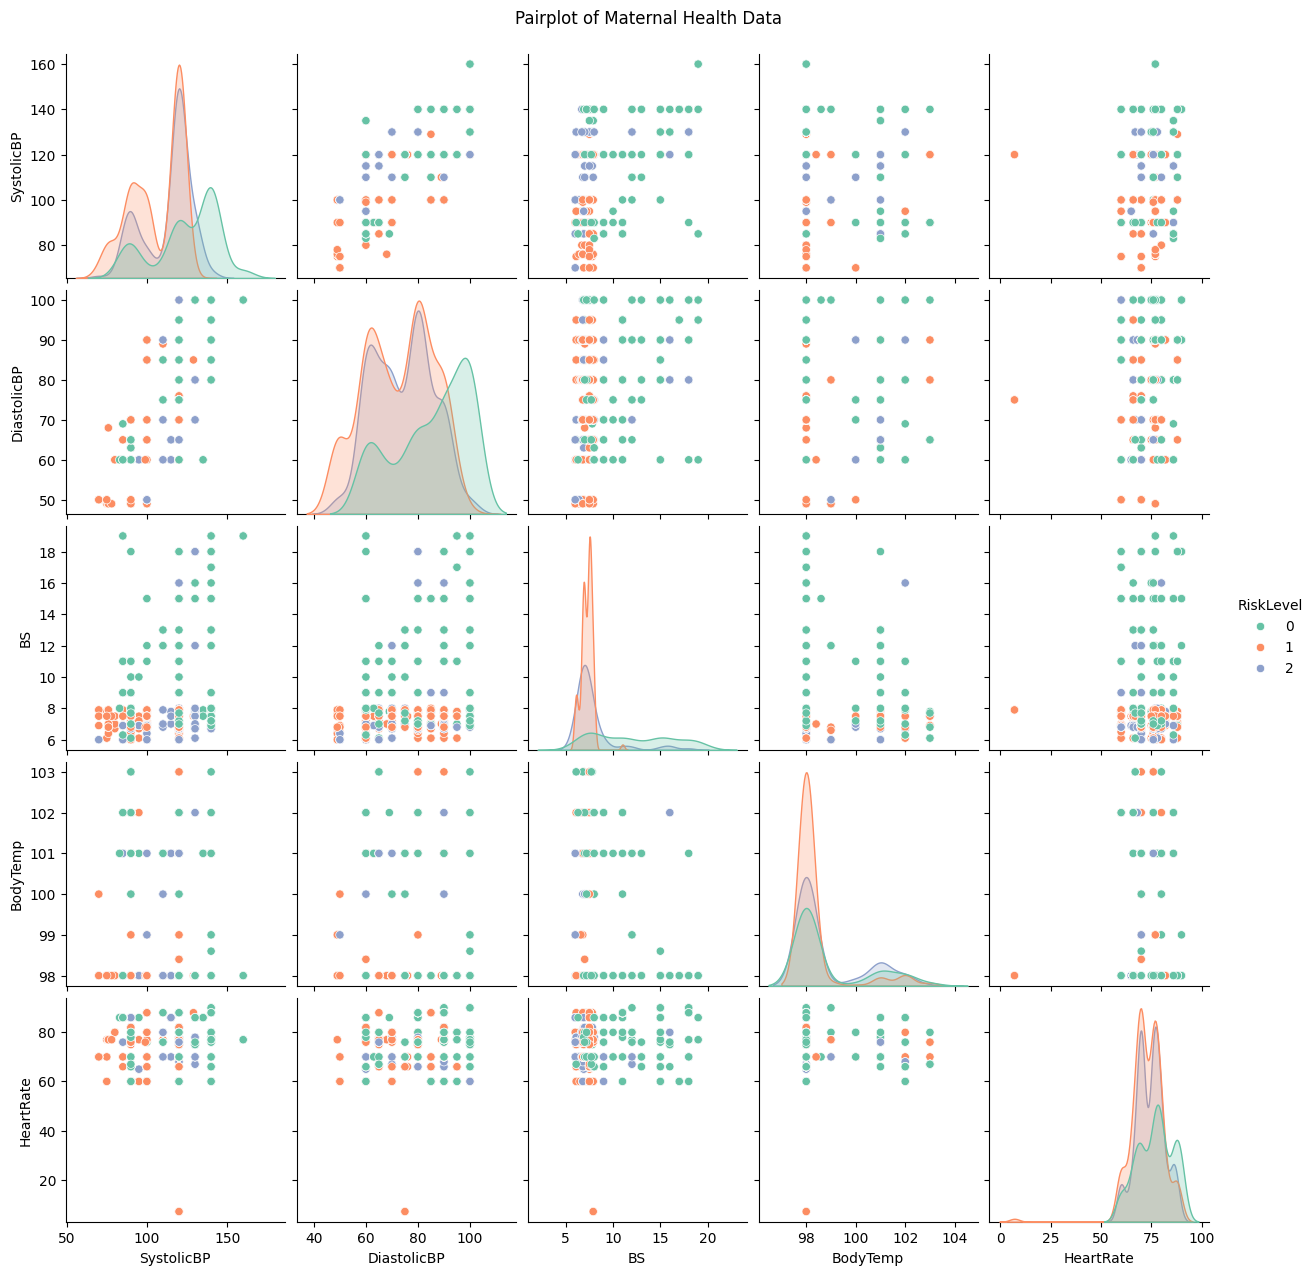

In [ ]:
# Pairplot visualization to assess linearity
sns.pairplot(
    df,
    vars=['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
    hue='RiskLevel',
    diag_kind='kde',
    palette='Set2'
)

plt.suptitle("Pairplot of Maternal Health Data", y=1.02)
plt.show()

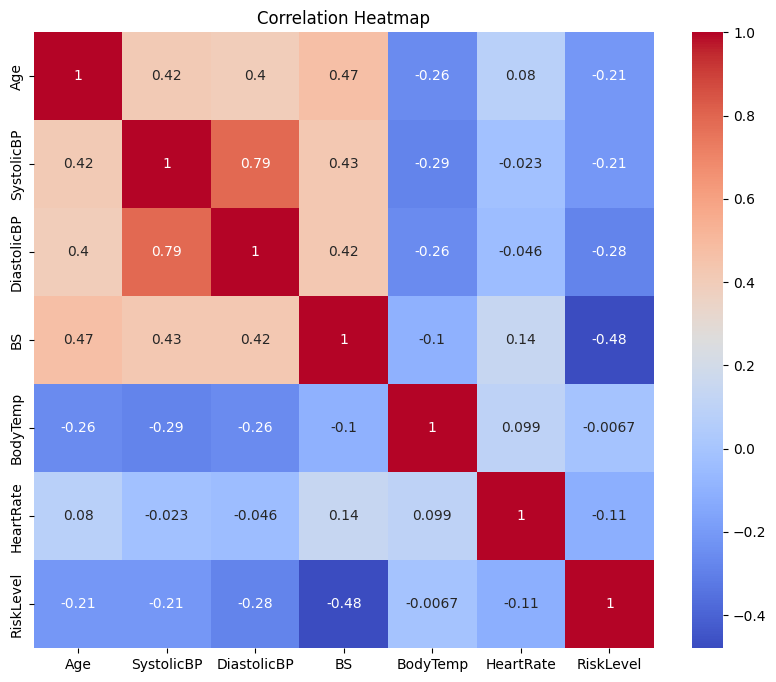

In [10]:

le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])  # low risk=0, mid risk=1, high risk=2

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


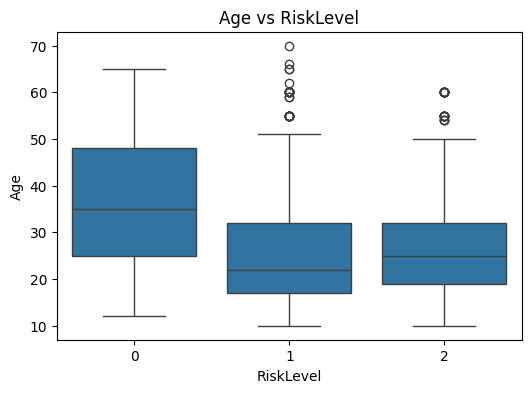

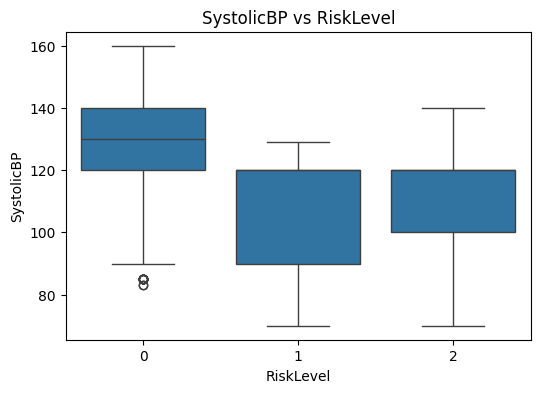

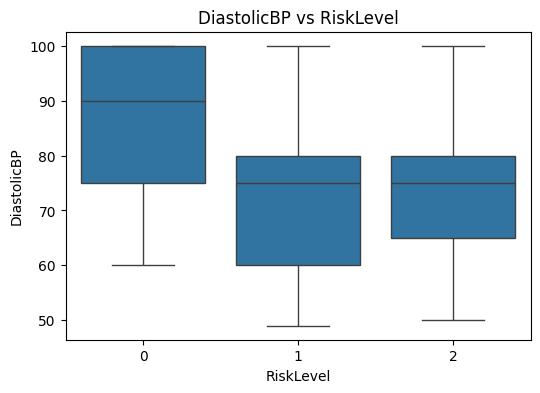

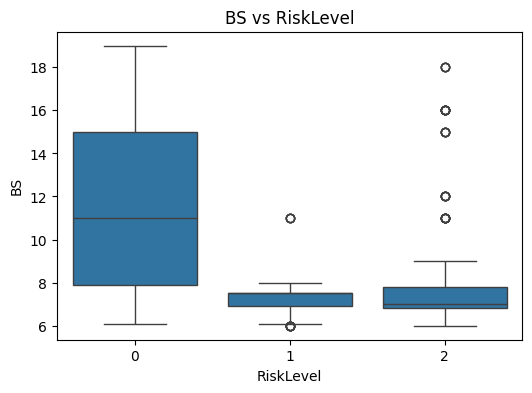

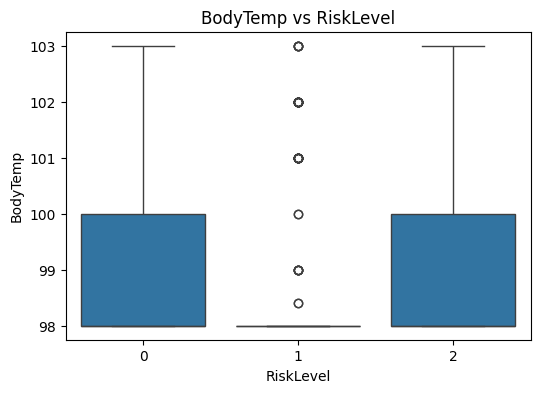

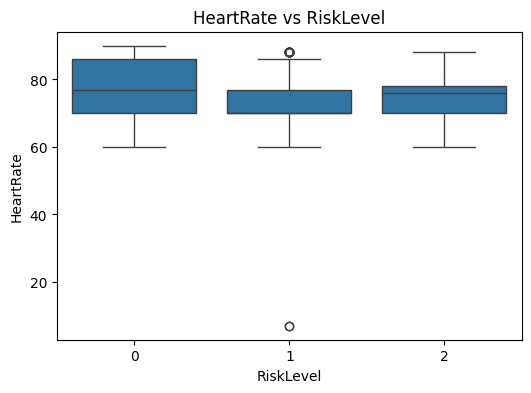

In [11]:
# EDA: Boxplots for features vs RiskLevel
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='RiskLevel', y=feature, data=df)
    plt.title(f"{feature} vs RiskLevel")
    plt.show()

In [12]:
# Features and target
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [13]:
# Check for any missing values 
print("Missing values:")
print(df.isnull().sum())

Missing values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
# Define models in pipelines
pipelines = {
    'RandomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', probability=True, random_state=42))
    ])
}



RandomForest Model:
Training Accuracy: 0.9248
Testing Accuracy: 0.8621

Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       217
           1       0.94      0.92      0.93       325
           2       0.90      0.91      0.90       269

    accuracy                           0.92       811
   macro avg       0.92      0.93      0.93       811
weighted avg       0.92      0.92      0.92       811

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.89      0.80      0.84        81
           2       0.76      0.87      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.86      0.86       203



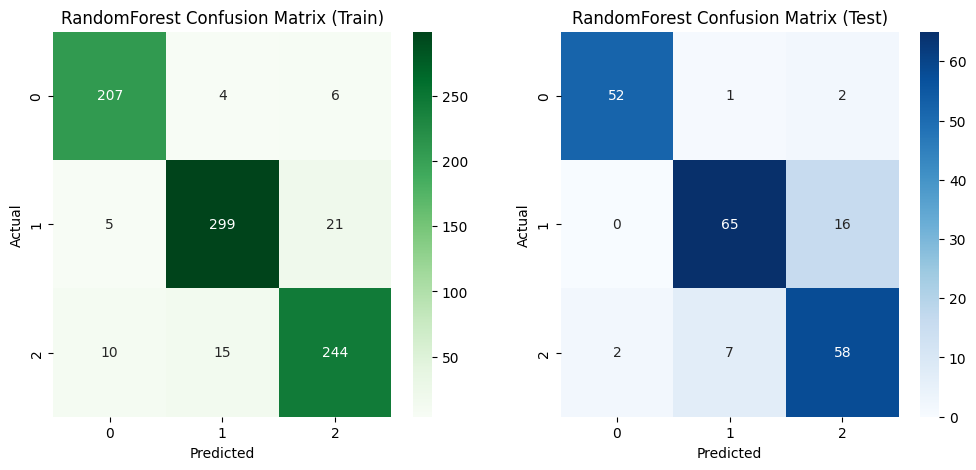


XGBoost Model:
Training Accuracy: 0.9248
Testing Accuracy: 0.8571

Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       217
           1       0.93      0.93      0.93       325
           2       0.91      0.90      0.90       269

    accuracy                           0.92       811
   macro avg       0.92      0.93      0.93       811
weighted avg       0.92      0.92      0.92       811

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.92      0.80      0.86        81
           2       0.76      0.88      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.86      0.86       203
weighted avg       0.87      0.86      0.86       203



c:\Users\USER\OneDrive\Desktop\MATERNAL HEALTH RISK  PREDICTION\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:35:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


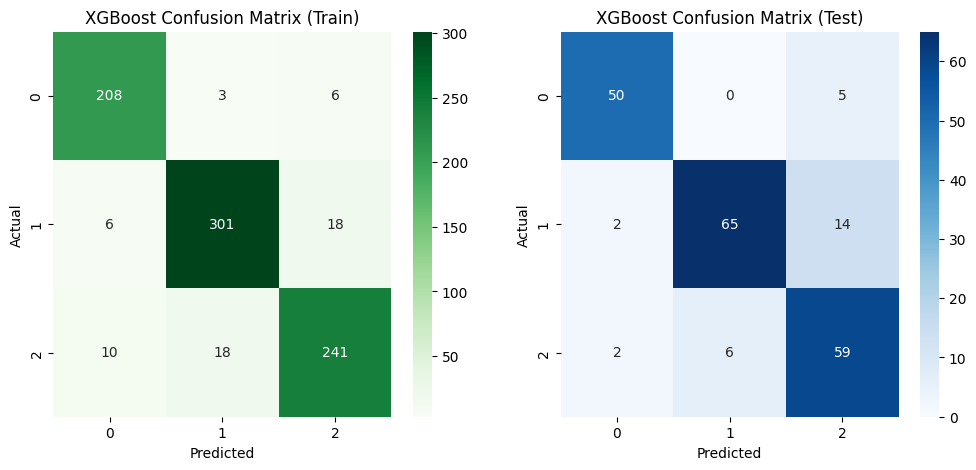


SVM Model:
Training Accuracy: 0.7213
Testing Accuracy: 0.7241

Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       217
           1       0.69      0.87      0.77       325
           2       0.67      0.45      0.54       269

    accuracy                           0.72       811
   macro avg       0.73      0.72      0.71       811
weighted avg       0.72      0.72      0.71       811

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.63      0.90      0.74        81
           2       0.70      0.39      0.50        67

    accuracy                           0.72       203
   macro avg       0.76      0.72      0.72       203
weighted avg       0.74      0.72      0.71       203



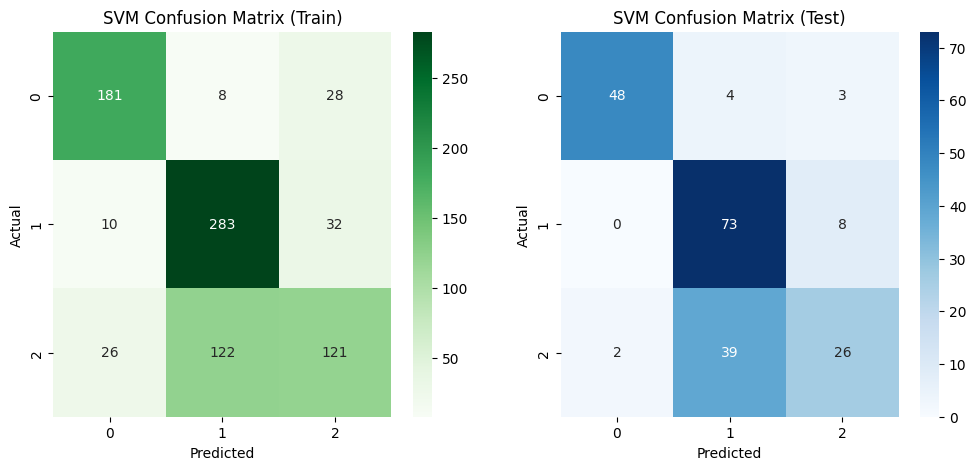

In [22]:
from sklearn.metrics import accuracy_score
# Train and evaluate models
for name, pipeline in pipelines.items():
    print(f"\n{name} Model:")
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}\n")
    
    # Classification reports
    print("Training Classification Report:")
    print(classification_report(y_train, y_train_pred))
    
    print("Testing Classification Report:")
    print(classification_report(y_test, y_test_pred))
    
    # Confusion matrices
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Greens', ax=axes[0])
    axes[0].set_title(f"{name} Confusion Matrix (Train)")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title(f"{name} Confusion Matrix (Test)")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    
    plt.show()

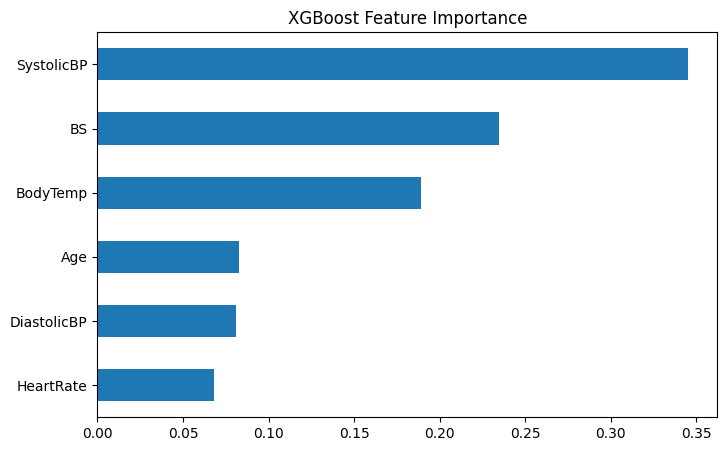

In [24]:
# Get XGBoost model from the pipeline
xgb_model = pipelines['XGBoost'].named_steps['xgb']

# Feature importance
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("XGBoost Feature Importance")
plt.show()

